## CS636 Computer Vision
### Binary Image Assignment
### 202363006 - Shah Rushabh Rupambhai

### Task

Step 1: Take a photograph of an object (for example: a pen, a coin) on a white page. Using binary image algorithms discussed in class, find:
- Area
- Position
- Orientation
- Roundness

Step 2: Take photographs of two objects (two pens) on one page, then repeat step 1.

#### Step 1:

Importing the required libraries like `opencv` for converting image to grayscale, binary and other operations. Importing `numpy`  and `matplotlib.pyplot` for doing mathematical computation and plotting of the binary image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Step 2:

Certainly! Let me explain each part of the `calculate_properties` function:

1. Calculating the area:
   - Summing up all of the non-zero (white) pixels yields the binary image's `area`. We divide the total by 255 to convert the total number of white pixels to the area of the object, since the binary image usually depicts objects with white pixels.

2. Calculating Centroid or say Position:
   - Using the image's moments, the centroid of the object in the binary image is calculated. Properties like the centroid can be computed using moments, which are weighted averages of pixel intensities. 'm10' and'm01', the first moments in the x and y directions, respectively, are used to calculate the centroid coordinates (cx, cy).

3. Calculating Orientation using PCA:
   - Principal Component Analysis (PCA) is applied to the non-zero points of the binary image to determine the orientation of the object.
   - PCA is a statistical technique used to find patterns in data by projecting it onto a lower-dimensional space defined by the principal components.
   - Here, the covariance matrix of the non-zero points is computed, and its eigenvectors and eigenvalues are obtained.
   - The orientation of the object is then calculated from the eigenvectors.

4. Calculating Perimeters using Morphological Operations:
   - Morphological operations are performed on the binary image in order to determine the perimeter, or the length of the boundary, of the object.
   - To enlarge the object boundaries, the binary image is first dilated using a tiny elliptical structuring element.
   - The original binary image is subtracted from the dilated image to obtain the perimeter image.
   - The perimeter length can be approximated using the sum of the non-zero pixels in the perimeter image.

5. Calculating Roundness:
   - Here if the object is perfect circle like for example a coin then the roundness will be approx to one.
   - Finally, the roundness of the object is computed using the formula:
    $$
   \begin{aligned} 
        \frac{{4 \pi \times \text{{Area}}}}{{\text{{Perimeter}}^2}}.
    \end{aligned}
   $$
   - This formula represents a measure of how closely the shape of the object resembles a perfect circle. A value close to 1 indicates a rounder shape.

In [2]:
def calculate_properties(binary_image):
    # Area
    area = np.sum(binary_image) // 255

    # Postion
    M = cv2.moments(binary_image)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    # Orientation
    nonzero_points = np.transpose(np.nonzero(binary_image))
    cov_matrix = np.cov(nonzero_points, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    orientation = np.degrees(np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0]))

    # Perimeter
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    dilated = cv2.dilate(binary_image, structuring_element)
    perimeter_image = dilated - binary_image
    perimeter = np.sum(perimeter_image) // 255

    # Roundness
    roundness = 4 * np.pi * area / (perimeter ** 2)

    return area, (cx, cy), orientation, roundness

#### Note: 

Initially I tried using white background and dark objects but the value I received was not proper so I inverted the image.

Here the code I initially used for it:

```python
# For single object
image = cv2.imread('sample_images/One_coin2.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
area, position, orientation, roundness = calculate_properties(binary_image)

#For double objects
image_two_objects = cv2.imread('sample_images/Two_coins2.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image_two_objects = cv2.threshold(image_two_objects, 127, 255, cv2.THRESH_BINARY)
area_1, position_1, orientation_1, roundness_1 = calculate_properties(binary_image_two_objects)
```

What this 2 lines of code depict?

```python
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
```
- First line converts the image into gray scale image.
- Second line applies thresholding to the grayscale image to convert it into a binary image.
    - Thresholding is a technique used to separate objects from the background in an image based on pixel intensity.

Single Object Properties:
Area: 388675
Position: (1442, 1715)
Orientation: -147.31564023564545
Roundness: 1.2210585246340129


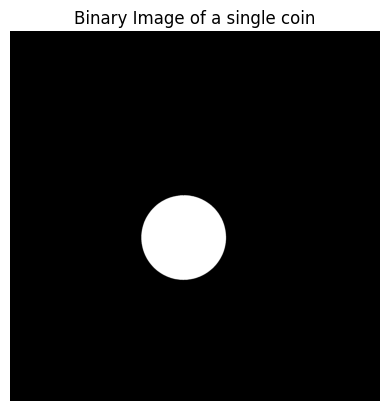


Two Objects Properties:
Area: 610422
Position: (1644, 1828)
Orientation: -125.5210648951869
Roundness: 0.5618380602949423


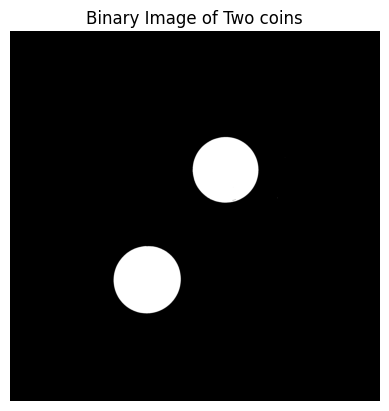

In [3]:
# For a single coin image

image = cv2.imread('sample_images/One_coin2.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
area, position, orientation, roundness = calculate_properties(binary_image)
    
print("Single Object Properties:")
print("Area:", area)
print("Position:", position)
print("Orientation:", orientation)
print("Roundness:", roundness)


plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image of a single coin')
plt.axis('off')
plt.show()

# For two coins image

image_two_objects = cv2.imread('sample_images/Two_coins2.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image_two_objects = cv2.threshold(image_two_objects, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
area_1, position_1, orientation_1, roundness_1 = calculate_properties(binary_image_two_objects)
    
print("\nTwo Objects Properties:")
print("Area:", area_1)
print("Position:", position_1)
print("Orientation:", orientation_1)
print("Roundness:", roundness_1)


plt.imshow(binary_image_two_objects, cmap='gray')
plt.title('Binary Image of Two coins')
plt.axis('off')
plt.show()

Single Object Properties:
Area: 924406
Position: (1713, 2166)
Orientation: -115.24214094445321
Roundness: 0.026454361832011556


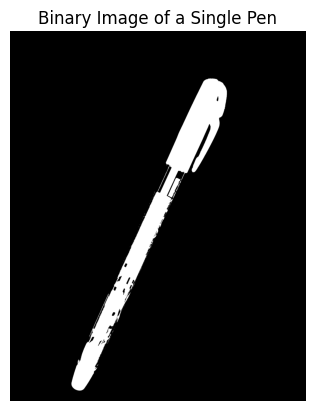


Two Objects Properties:
Area: 1109994
Position: (1928, 1999)
Orientation: -116.100647777759
Roundness: 0.012420975915818179


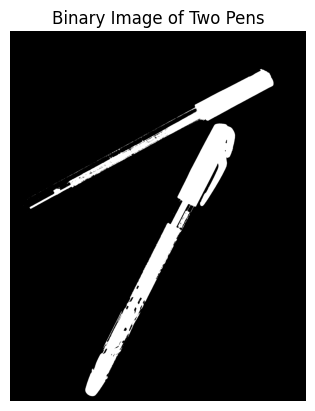

In [4]:
# For a single pen image


image = cv2.imread('sample_images/One_pen2.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
area, position, orientation, roundness = calculate_properties(binary_image)
    
print("Single Object Properties:")
print("Area:", area)
print("Position:", position)
print("Orientation:", orientation)
print("Roundness:", roundness)


plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image of a Single Pen')
plt.axis('off')
plt.show()

# For two pens image

image_two_objects = cv2.imread('sample_images/Two_pens2.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image_two_objects = cv2.threshold(image_two_objects, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
area_1, position_1, orientation_1, roundness_1 = calculate_properties(binary_image_two_objects)
    
print("\nTwo Objects Properties:")
print("Area:", area_1)
print("Position:", position_1)
print("Orientation:", orientation_1)
print("Roundness:", roundness_1)


plt.imshow(binary_image_two_objects, cmap='gray')
plt.title('Binary Image of Two Pens')
plt.axis('off')
plt.show()